# Pymaceuticals Inc.
---

### Analysis

Here are three observations or inferences that can be made from the data:

1. Correlation between Mouse Weight and Tumor Volume on Capomulin:

    • The correlation coefficient of 0.84 indicates a strong positive relationship between mouse weight and tumor volume within the Capomulin regimen. This suggests that as the weight of the mouse increases, the tumor volume also tends to be larger. This could imply that weight is a significant factor in the efficacy of the drug or that larger mice inherently develop larger tumors.
2. Capomulin's Effect Over Time for Mouse l509:

    • The line plot of tumor volume versus time point for mouse l509 treated with Capomulin would provide insights into the drug's efficacy over the 45-day study period. If the line plot shows a decreasing trend in tumor volume over time, it can be inferred that Capomulin was effective in reducing tumor size for this particular mouse. However, it would be necessary to look at more mice to determine if this effect is consistent across the population.
3. Drug Regimen Testing Frequency:

    • The bar plot showing the total number of observations for each drug regimen suggests which drugs were most frequently tested. A higher number of observations could indicate a more extensive evaluation of that drug's efficacy and safety. If Capomulin had a high number of observations, this would support the idea that it was a primary focus of the study and that the data on its efficacy and safety is likely to be robust.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how='left')

# Display the data table for preview
combine_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(combine_df['Mouse ID'].unique())
print(number_of_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_df[combine_df.duplicated()]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combine_df[combine_df['Mouse ID'] == duplicate_mice['Mouse ID'].iloc[0]] 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df['Mouse ID']!= duplicate_mice['Mouse ID'].iloc[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_df['Mouse ID'].unique())
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_df = clean_df[['Drug Regimen', "Tumor Volume (mm3)"]]
regimen_df = regimen_df.set_index(["Drug Regimen"])
regimen_df = regimen_df.groupby(['Drug Regimen'])
regimen_df_mean = regimen_df.mean()
regimen_df_median = regimen_df.median()
regimen_df_variance = regimen_df.var()
regimen_df_standard_deviation = regimen_df.std()
regimen_df_SEM = regimen_df.sem()
regimen_summary_statistics = pd.DataFrame({"Mean Tumor Volume": regimen_df_mean['Tumor Volume (mm3)'],
                                           "Median Tumor Volume": regimen_df_median['Tumor Volume (mm3)'],
                                            "Tumor Volume Variance": regimen_df_variance['Tumor Volume (mm3)'],
                                            "Tumor Volume Std. Dev.": regimen_df_standard_deviation['Tumor Volume (mm3)'],
                                            "Tumor Volume Std. Err.": regimen_df_SEM['Tumor Volume (mm3)']})
regimen_summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_regimen = regimen_df.aggregate(["mean","median","var","std","sem"])
agg_stats_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

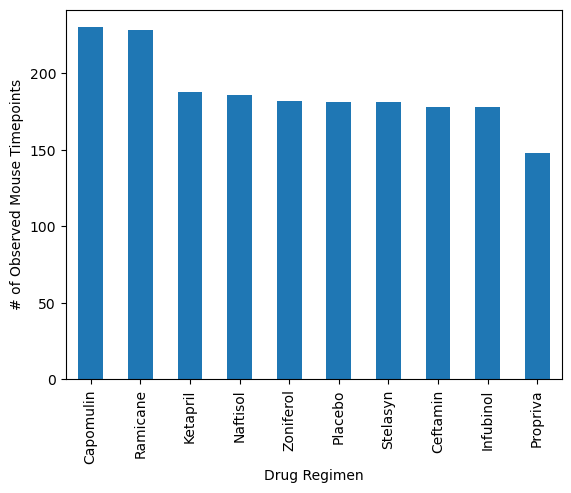

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_num_drug_regimen = clean_df.groupby(['Drug Regimen'])["Mouse ID"].count().sort_values( ascending=False)
total_num_drug_regimen.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints" )
plt.show

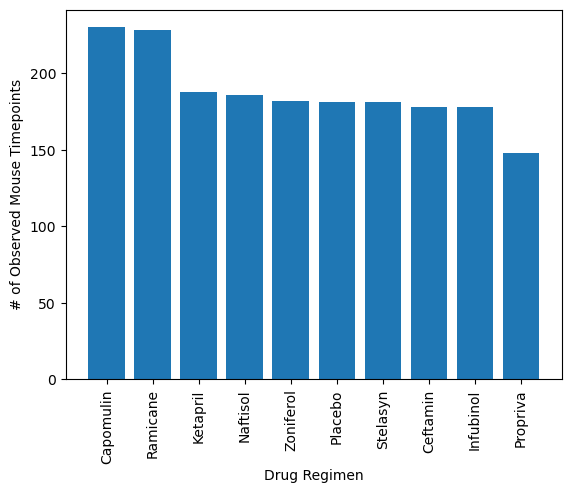

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_values = list(range(0,len(total_num_drug_regimen.index)))
plt.bar(x_values, total_num_drug_regimen.values)
plt.xticks(x_values, total_num_drug_regimen.index, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints" )
plt.show()

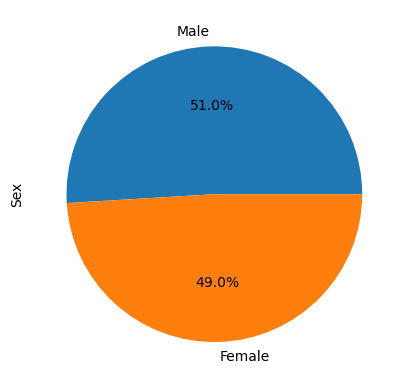

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_df["Sex"].value_counts()
gender_count.plot(kind="pie", autopct = '%1.1f%%')
plt.ylabel("Sex")

plt.show()

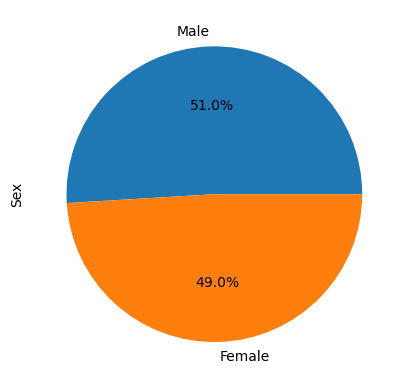

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, autopct = '%1.1f%%', labels=gender_count.index)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", 'Ramicane', 'Infubinol',  'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_df = pd.merge(last_timepoint, clean_df, on= ["Mouse ID", "Timepoint"], how='left')
timepoint_df = timepoint_df[timepoint_df["Drug Regimen"].isin(treatments)]
timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
outliers = {}
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments :

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = timepoint_df.loc[timepoint_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(treatment_df)    
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_df.quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_bounds = q1 - 1.5*iqr
    upper_bounds = q3 + 1.5*iqr
    outliers_values = treatment_df[(treatment_df<lower_bounds) | (treatment_df>upper_bounds)]
    outliers[treatment] = outliers_values
outliers

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

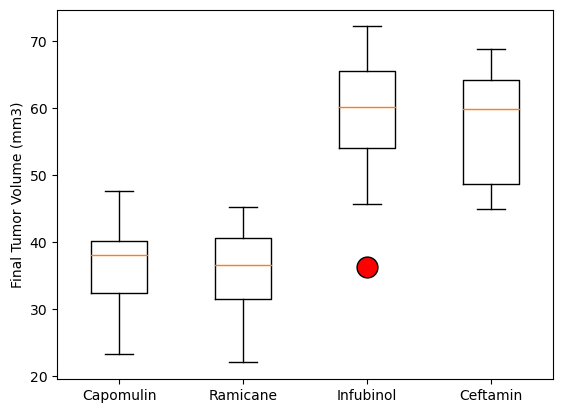

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_format = dict(markerfacecolor='r', marker='o', markeredgecolor='black', markersize=15)
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=outlier_format)
plt.ylabel ("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

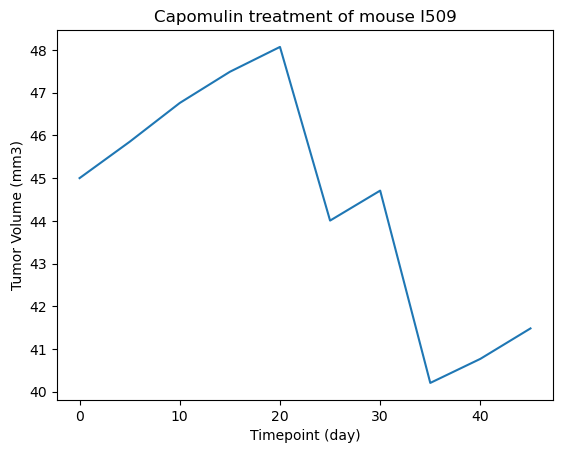

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509")]
plt.plot(capomulin_df["Timepoint"], capomulin_df["Tumor Volume (mm3)"] )
plt.xlabel("Timepoint (day)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

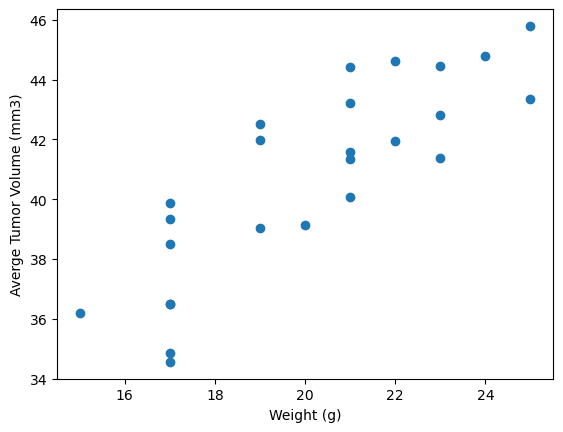

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_volume_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin")].groupby(["Weight (g)", "Mouse ID"]).mean(numeric_only = True)["Tumor Volume (mm3)"].to_frame()
weight_volume_df.reset_index(level=[0,1],inplace=True)
plt.scatter(weight_volume_df["Weight (g)"], weight_volume_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Averge Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


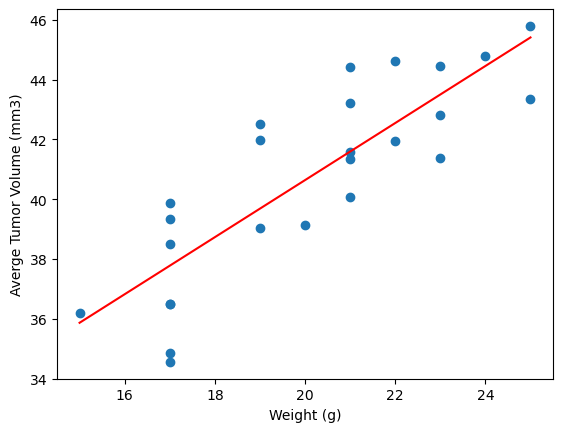

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight_volume_df["Weight (g)"], weight_volume_df["Tumor Volume (mm3)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_volume_df["Weight (g)"], weight_volume_df["Tumor Volume (mm3)"])
regress_values = weight_volume_df["Weight (g)"] * slope + intercept
print("The correlation between mouse weight and the average tumor volume is {0:0.2f}".format(correlation[0]))
plt.scatter(weight_volume_df["Weight (g)"], weight_volume_df["Tumor Volume (mm3)"])
plt.plot(weight_volume_df["Weight (g)"],regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Averge Tumor Volume (mm3)")
plt.show()